In [30]:
# import
import os
from pathlib import Path
import glob
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import shutil

In [2]:
classNames = []
img_size = []
for imgName in glob.glob("./8a95c26e1bab11eb/dataset/tfData2/train/**/*.jpg"):
    classNames.append(imgName.split("/")[-2])
    img_size.append(np.asarray(Image.open(imgName)).shape[0:2])

# print(img_size)
print(Counter(classNames))

Counter({'thamnophis-sirtalis': 509, 'storeria-dekayi': 412, 'pantherophis-obsoletus': 366, 'crotalus-atrox': 354, 'pituophis-catenifer': 298, 'nerodia-sipedon': 259, 'agkistrodon-contortrix': 206, 'lampropeltis-triangulum': 197, 'diadophis-punctatus': 184, 'pantherophis-alleghaniensis': 172, 'nerodia-erythrogaster': 171, 'lampropeltis-californiae': 166, 'opheodrys-aestivus': 152, 'agkistrodon-piscivorus': 147, 'crotalus-horridus': 142, 'coluber-constrictor': 129, 'heterodon-platirhinos': 118, 'thamnophis-proximus': 112, 'nerodia-rhombifer': 104, 'thamnophis-radix': 100, 'pantherophis-guttatus': 100, 'haldea-striatula': 98, 'pantherophis-spiloides': 92, 'rhinocheilus-lecontei': 91, 'storeria-occipitomaculata': 87, 'masticophis-flagellum': 83, 'crotalus-viridis': 83, 'thamnophis-marcianus': 82, 'crotalus-ruber': 77, 'nerodia-fasciata': 74, 'pantherophis-vulpinus': 73, 'natrix-natrix': 72, 'thamnophis-elegans': 69, 'pantherophis-emoryi': 66, 'crotalus-scutulatus': 63})


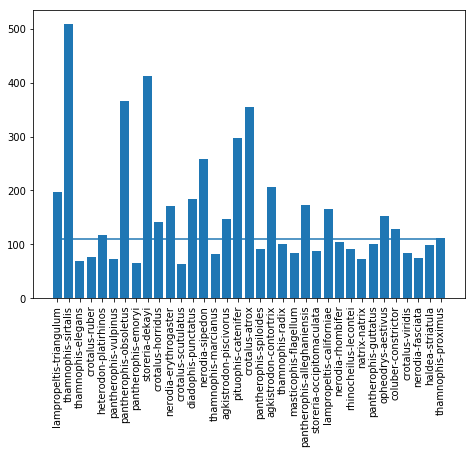

In [3]:


fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

className = []
qnty = []

plt.xticks(rotation=90)

for item,key in Counter(classNames).items():
    className.append(item)
    qnty.append(key)

ax.bar(className,qnty)
ax.plot([110]*35)

# plt.show()

In [4]:
# find average image size
avg_x = 0
avg_y = 0

for x,y in img_size:
    avg_x += x
    avg_y += y

print(avg_x/len(img_size))
print(avg_y/len(img_size))

127.83896151053014
128.0


In [5]:
# find average no of sample
sum(qnty)/len(qnty)

157.37142857142857

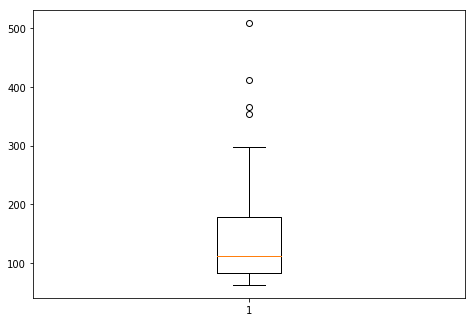

In [6]:
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot(qnty)
plt.show()

In [7]:
print(min(qnty))

63


In [8]:
np.quantile(qnty,0.5)

112.0

In [9]:
np.quantile(qnty,0.25)

83.0

In [10]:
np.quantile(qnty,0.75)

178.0

In [11]:
max(qnty)

509

#  so 110 image for every category will be the best option

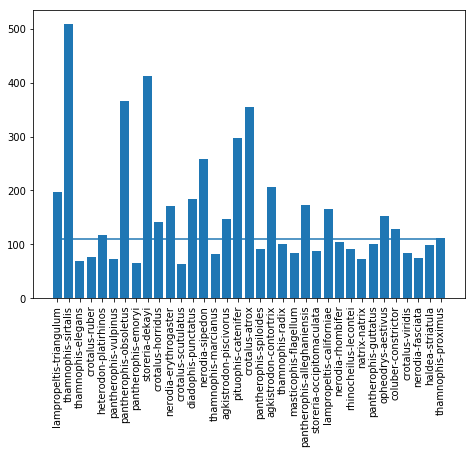

In [12]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

plt.xticks(rotation=90)

ax.bar(className,qnty)
# plt.show()
ax.plot([110]*35)

In [34]:
# making all class directoy
srcRoot= "./8a95c26e1bab11eb/dataset/tfData3/train/"

for folderName in os.listdir("./8a95c26e1bab11eb/dataset/tfData2/train/"):
    if not os.path.exists(srcRoot + "/"+ folderName):
        os.mkdir(srcRoot + "/"+ folderName)

In [35]:
# list of transform function
flipLR = lambda im: im.transpose(Image.FLIP_LEFT_RIGHT)
flipTB = lambda im:im.transpose(Image.FLIP_TOP_BOTTOM)
r90 = lambda im:im.transpose(Image.ROTATE_90)
r180 = lambda im:im.transpose(Image.ROTATE_180)
r270 = lambda im:im.transpose(Image.ROTATE_270)
transformFn = [flipLR,flipTB,r90,r180,r270]

In [36]:
# /home/saurav/Documents/hackerearth/Identify the snake breed/8a95c26e1bab11eb/dataset/tfData_processed/train

No_IMG_AVG = 400

srcRoot= "./8a95c26e1bab11eb/dataset/tfData2/train/"
distRoot= "./8a95c26e1bab11eb/dataset/tfData3/train/"

for folderName in os.listdir(srcRoot):
    temp = []
    for imgName in glob.glob(srcRoot+ folderName + "/*.jpg"):
        temp.append(imgName)
    
    assert len(temp)!=0
    
    if len(temp) > No_IMG_AVG:
        """undersampling image randomly"""
        randImgIdx = random.sample(range(len(temp)), No_IMG_AVG)
        
        for idx in randImgIdx:
            srcPath = Path(temp[idx])
            distPath = Path(temp[idx].replace("tfData2","tfData3"))            
            if srcPath.exists and not distPath.exists():
                #srcPath.replace(distPath)
                shutil.copy(str(srcPath), str(distPath))
        
    else:
        """oversampling image randomly"""
        img_need = No_IMG_AVG - len(temp)
        
        # All transormation: rotate, mirror, zoom, randomcrop,
        for idx in range(img_need):
            
            transform = transformFn[np.random.randint(0,5)]
            
            rndImgPath = temp[np.random.randint(0,len(temp))]
            
            img = Image.open(rndImgPath)
            
            t_img = transform(img)
            
            distPath = Path(rndImgPath.replace("tfData2","tfData3"))
            
            t_img.save(str(distPath.parent) + "/"+ str(distPath.stem) + "_%d.jpg"%(np.random.randint(0,100)),"JPEG")
            
        # move the remaining image
        for rpath in temp:
            srcPath = Path(rpath)
            distPath = Path(rpath.replace("tfData2","tfData3"))
            if srcPath.exists and not distPath.exists():
                #srcPath.replace(distPath)
                shutil.copy(str(srcPath), str(distPath))

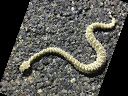

In [73]:
img_path ="./8a95c26e1bab11eb/dataset/tfData/train/crotalus-scutulatus/c94fd43963.jpg"
Image.open(img_path).rotate(np.random.randint(-90,+90))

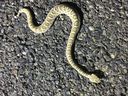

In [77]:
Image.open(img_path).rotate(-180)

In [82]:
Image.open(img_path).rotate(-180).save("myimg.jpg","JPEG")

In [95]:
for folderName in os.listdir(srcRoot):
    print(folderName)

crotalus-scutulatus
lampropeltis-californiae
storeria-occipitomaculata
opheodrys-aestivus
diadophis-punctatus
nerodia-sipedon
thamnophis-sirtalis
lampropeltis-triangulum
pantherophis-obsoletus
pantherophis-vulpinus
pantherophis-emoryi
storeria-dekayi
coluber-constrictor
natrix-natrix
pituophis-catenifer
rhinocheilus-lecontei
crotalus-ruber
agkistrodon-piscivorus
thamnophis-proximus
pantherophis-alleghaniensis
heterodon-platirhinos
haldea-striatula
crotalus-horridus
crotalus-viridis
agkistrodon-contortrix
pantherophis-spiloides
crotalus-atrox
pantherophis-guttatus
nerodia-erythrogaster
thamnophis-marcianus
nerodia-rhombifer
nerodia-fasciata
thamnophis-elegans
masticophis-flagellum
thamnophis-radix


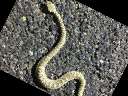

In [100]:
img_path ="./8a95c26e1bab11eb/dataset/tfData/train/crotalus-scutulatus/c94fd43963.jpg"
Image.open(img_path).rotate(np.random.randint(-90,+90))

# New Data Dsitribution

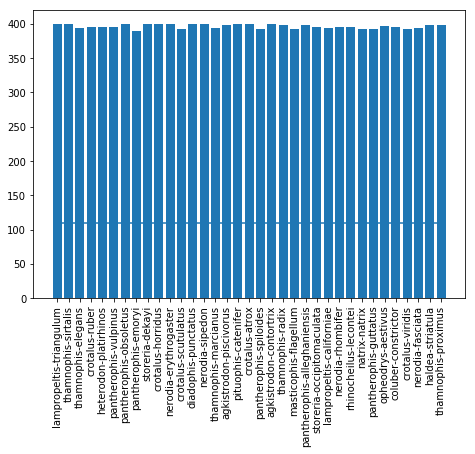

In [37]:
classNames = []
img_size = []
for imgName in glob.glob("./8a95c26e1bab11eb/dataset/tfData3/train/**/*.jpg"):
    classNames.append(imgName.split("/")[-2])
    img_size.append(np.asarray(Image.open(imgName)).shape[0:2])



fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

className = []
qnty = []

plt.xticks(rotation=90)

for item,key in Counter(classNames).items():
    className.append(item)
    qnty.append(key)

ax.bar(className,qnty)
ax.plot([110]*35)

# plt.show()


In [134]:
randImgIdx = np.random.random_sample(4)
randImgIdx

array([0.99929247, 0.43962563, 0.95990111, 0.61943391])

In [137]:
import random
print(random.sample(range(502), 128))

[500, 285, 466, 374, 467, 219, 339, 414, 365, 282, 70, 268, 56, 226, 133, 286, 277, 312, 436, 194, 178, 83, 95, 464, 501, 124, 137, 152, 488, 443, 446, 340, 292, 157, 116, 76, 141, 415, 468, 275, 378, 372, 174, 452, 88, 369, 391, 434, 38, 447, 188, 0, 203, 206, 236, 181, 455, 481, 104, 80, 410, 34, 149, 185, 32, 150, 68, 304, 118, 261, 298, 317, 110, 294, 97, 310, 398, 278, 380, 131, 331, 198, 100, 438, 326, 127, 301, 483, 368, 199, 357, 494, 43, 218, 182, 134, 103, 413, 475, 1, 355, 89, 99, 167, 231, 138, 216, 496, 479, 462, 44, 472, 257, 233, 283, 249, 358, 260, 217, 125, 409, 490, 399, 352, 75, 259, 65, 384]


In [25]:
srcRoot= "./8a95c26e1bab11eb/dataset/tfData2/train/"
distRoot= "./8a95c26e1bab11eb/dataset/tfData3/train/"

for folderName in os.listdir(srcRoot):
    temp = []
    print(srcRoot + folderName + "/*.jpg")
    for imgName in glob.glob(srcRoot + folderName + "/*.jpg"):
        print(imgName)
        
    break

./8a95c26e1bab11eb/dataset/tfData2/train/crotalus-scutulatus/*.jpg
./8a95c26e1bab11eb/dataset/tfData2/train/crotalus-scutulatus/70edf1846e.jpg
./8a95c26e1bab11eb/dataset/tfData2/train/crotalus-scutulatus/b0659d7a56.jpg
./8a95c26e1bab11eb/dataset/tfData2/train/crotalus-scutulatus/ef18bd69e1.jpg
./8a95c26e1bab11eb/dataset/tfData2/train/crotalus-scutulatus/251f983887.jpg
./8a95c26e1bab11eb/dataset/tfData2/train/crotalus-scutulatus/805a68a6ad.jpg
./8a95c26e1bab11eb/dataset/tfData2/train/crotalus-scutulatus/f867ba6469.jpg
./8a95c26e1bab11eb/dataset/tfData2/train/crotalus-scutulatus/7939b7d46b.jpg
./8a95c26e1bab11eb/dataset/tfData2/train/crotalus-scutulatus/1052a59ca8.jpg
./8a95c26e1bab11eb/dataset/tfData2/train/crotalus-scutulatus/a77f24ce64.jpg
./8a95c26e1bab11eb/dataset/tfData2/train/crotalus-scutulatus/05cad1d8d7.jpg
./8a95c26e1bab11eb/dataset/tfData2/train/crotalus-scutulatus/4960f26588.jpg
./8a95c26e1bab11eb/dataset/tfData2/train/crotalus-scutulatus/2624da4125.jpg
./8a95c26e1bab11eb/da